# Lead Score - Case Study

### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

There are a lot of leads generated in the initial stage but only a few of them gets converted as paying customers. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education wants help in selecting the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Goals of the Case Study

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

- There are some more problems presented by the company which our model should be able to adjust to if the company's requirement changes in the future so we will need to handle these as well.


### Solution Approach steps

1. Data Read and Understanding
2. Data Cleaning and Preparation
3. Model Building
4. Model Evaluation
5. Making Predictions on the Test Set

In [1]:
# importing required libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Data Read and Understanding

In [2]:
# Loading the data

lead_df = pd.read_csv('Leads.csv')

In [3]:
# cheching top 5 rows
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# check the data shape
lead_df.shape

(9240, 37)

In [5]:
# inspecting the data info
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# inspect the numeric colums
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### 2. Data Cleaning and Preparation

In [7]:
# check for null values
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
# capturing the application missing values to do further analysis
lead_values_missing = lead_df.isnull().mean()*100
lead_values_missing

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [9]:
# filtering only columns which have missing values more than 0
lead_values_missing = lead_values_missing[lead_values_missing > 0]
lead_values_missing

Lead Source                                       0.389610
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Quality                                     51.590909
Lead Profile                                     29.318182
City                                             15.367965
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score                       45.6493

In [10]:
# Identifying the columns with missing values >30%
lead_values_missing_30 = lead_values_missing[lead_values_missing>30]
lead_values_missing_30

Tags                           36.287879
Lead Quality                   51.590909
Asymmetrique Activity Index    45.649351
Asymmetrique Profile Index     45.649351
Asymmetrique Activity Score    45.649351
Asymmetrique Profile Score     45.649351
dtype: float64

### As the above columns have missing values greater than 30%, we can drop them

In [11]:
#fetch the column names to be dropped
lead_values_missing_30.index

Index(['Tags', 'Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [12]:
columns_to_drop = lead_values_missing_30.index

In [13]:
# Drop the columns with more than 30% missing values
lead_df = lead_df.drop(columns=columns_to_drop)

In [14]:
# revalidate the shape of application dataframe post drop
lead_df.shape

(9240, 31)

In [15]:
#Analyse the missing values again in the cleaned dataframe
lead_df.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

#### As we can see above, columns below still have huge number of null values > 15%

- Lead Profile
- Country
- City
- Specialization
- How did you hear about X Education
- What is your current occupation
- What matters most to you in choosing a course

In [16]:
# let us analyze the lead profile column
lead_df['Lead Profile'].astype('category').value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [17]:
# let us check the percentage of each value
(lead_df['Lead Profile'].astype('category').value_counts() / len(lead_df)) * 100

Lead Profile
Select                         44.870130
Potential Lead                 17.456710
Other Leads                     5.270563
Student of SomeSchool           2.608225
Lateral Student                 0.259740
Dual Specialization Student     0.216450
Name: count, dtype: float64

#### As maximum values of 44.87% in Lead profile has value as Select, it is of not much use to us. So we can drop it.

In [18]:
# drop lead profile column
lead_df.drop(['Lead Profile'], axis = 1, inplace = True)

In [19]:
# let us analyze the What matters most to you in choosing a course column which has close to 30% null values
lead_df['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

#### 6528 times while the other two levels appear once twice and once respectively. So we should drop this column as well.

In [20]:
# drop What matters most to you in choosing a course column
lead_df.drop(['What matters most to you in choosing a course'], axis = 1, inplace = True)

#### Next city and country columns which have high null values can be dropped as it will not be of much use to us in modelling

In [21]:
lead_df.drop(['City','Country'], axis = 1, inplace = True)

In [22]:
# Re-analyse the missing values again in the cleaned dataframe
lead_df.isnull().mean()*100

Prospect ID                                  0.000000
Lead Number                                  0.000000
Lead Origin                                  0.000000
Lead Source                                  0.389610
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  1.482684
Total Time Spent on Website                  0.000000
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Specialization                              15.562771
How did you hear about X Education          23.885281
What is your current occupation             29.112554
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                   

In [23]:
# let us analyze Specialization and How did you hear about X Education columns
lead_df['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [24]:
lead_df['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

#### Since both of the above columns have maximum values as 'Select' and also has good number of missing values, it will not be helpful in our modelling, it would be good to drop these.

In [25]:
lead_df.drop(['How did you hear about X Education','Specialization'], axis = 1, inplace = True)

In [26]:
# Re-analyse the missing values again in the cleaned dataframe
lead_df.isnull().mean()*100

Prospect ID                                  0.000000
Lead Number                                  0.000000
Lead Origin                                  0.000000
Lead Source                                  0.389610
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  1.482684
Total Time Spent on Website                  0.000000
Page Views Per Visit                         1.482684
Last Activity                                1.114719
What is your current occupation             29.112554
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                                    0.000000
Digital Advertisement                        0.000000
Through Recommendations     

In [27]:
# let us analyze the What is your current occupation column
lead_df['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

#### Although the above column has many missing values and most of the values present as 'Unemployed', but this could be a good feature in our modeling in determining hot leads. Hence not dropping the entire column. We can just remove the rows with null values

In [28]:
lead_df = lead_df[~pd.isnull(lead_df['What is your current occupation'])]

In [29]:
# Re-analyse the missing values again in the cleaned dataframe
lead_df.isnull().mean()*100

Prospect ID                                 0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.549618
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.984733
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.984733
Last Activity                               1.572519
What is your current occupation             0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.

#### Now let us drop some of the columns related to advertisement seen by customer which will not be benificial in our modelling

In [30]:
lead_df.drop(['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement'], axis = 1, inplace = True)

In [31]:
# Re-analyse the missing values again in the cleaned dataframe
lead_df.isnull().mean()*100

Prospect ID                                 0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.549618
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.984733
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.984733
Last Activity                               1.572519
What is your current occupation             0.000000
Through Recommendations                     0.000000
Receive More Updates About Our Courses      0.000000
Update me on Supply Chain Content           0.000000
Get updates on DM Content                   0.000000
I agree to pay the amount through cheque    0.000000
A free copy of Mastering The Interview      0.000000
Last Notable Activity                       0.

#### Let us drop the small null rows from Lead Score, Total Visits, Last Activity and Page Views Per Visit

In [32]:
lead_df = lead_df[~pd.isnull(lead_df['Lead Source'])]

In [33]:
lead_df = lead_df[~pd.isnull(lead_df['TotalVisits'])]

In [34]:
lead_df = lead_df[~pd.isnull(lead_df['Page Views Per Visit'])]

In [35]:
lead_df = lead_df[~pd.isnull(lead_df['Last Activity'])]

In [36]:
# Re-analyse the missing values again in the cleaned dataframe
lead_df.isnull().mean()*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content                   0.0
I agree to pay the amount through cheque    0.0
A free copy of Mastering The Interview      0.0
Last Notable Activity                       0.0
dtype: float64

#### Now all the columns available have not missing values

#### Check if there are columns with one unique value since it won't be beneficial our analysis

In [37]:
lead_df.nunique()

Prospect ID                                 6391
Lead Number                                 6391
Lead Origin                                    4
Lead Source                                   16
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   38
Total Time Spent on Website                 1614
Page Views Per Visit                         107
Last Activity                                 16
What is your current occupation                6
Through Recommendations                        2
Receive More Updates About Our Courses         1
Update me on Supply Chain Content              1
Get updates on DM Content                      1
I agree to pay the amount through cheque       1
A free copy of Mastering The Interview         2
Last Notable Activity                         14
dtype: int64

In [38]:
# dropping unique valued columns
lead_df.drop(['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [39]:
# re-analyzing the unique columns
lead_df.nunique()

Prospect ID                               6391
Lead Number                               6391
Lead Origin                                  4
Lead Source                                 16
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
TotalVisits                                 38
Total Time Spent on Website               1614
Page Views Per Visit                       107
Last Activity                               16
What is your current occupation              6
Through Recommendations                      2
A free copy of Mastering The Interview       2
Last Notable Activity                       14
dtype: int64

In [40]:
lead_df.shape

(6391, 15)

In [41]:
# Removing Prospect ID and Lead Number columns since they are unique for everyone
lead_df.drop(['Prospect ID','Lead Number'], axis = 1, inplace = True)

In [42]:
lead_df.shape

(6391, 13)

In [43]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,No,Modified


### Univariate Analysis

In [44]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6391 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6391 non-null   object 
 1   Lead Source                             6391 non-null   object 
 2   Do Not Email                            6391 non-null   object 
 3   Do Not Call                             6391 non-null   object 
 4   Converted                               6391 non-null   int64  
 5   TotalVisits                             6391 non-null   float64
 6   Total Time Spent on Website             6391 non-null   int64  
 7   Page Views Per Visit                    6391 non-null   float64
 8   Last Activity                           6391 non-null   object 
 9   What is your current occupation         6391 non-null   object 
 10  Through Recommendations                 6391 non-null   object 
 

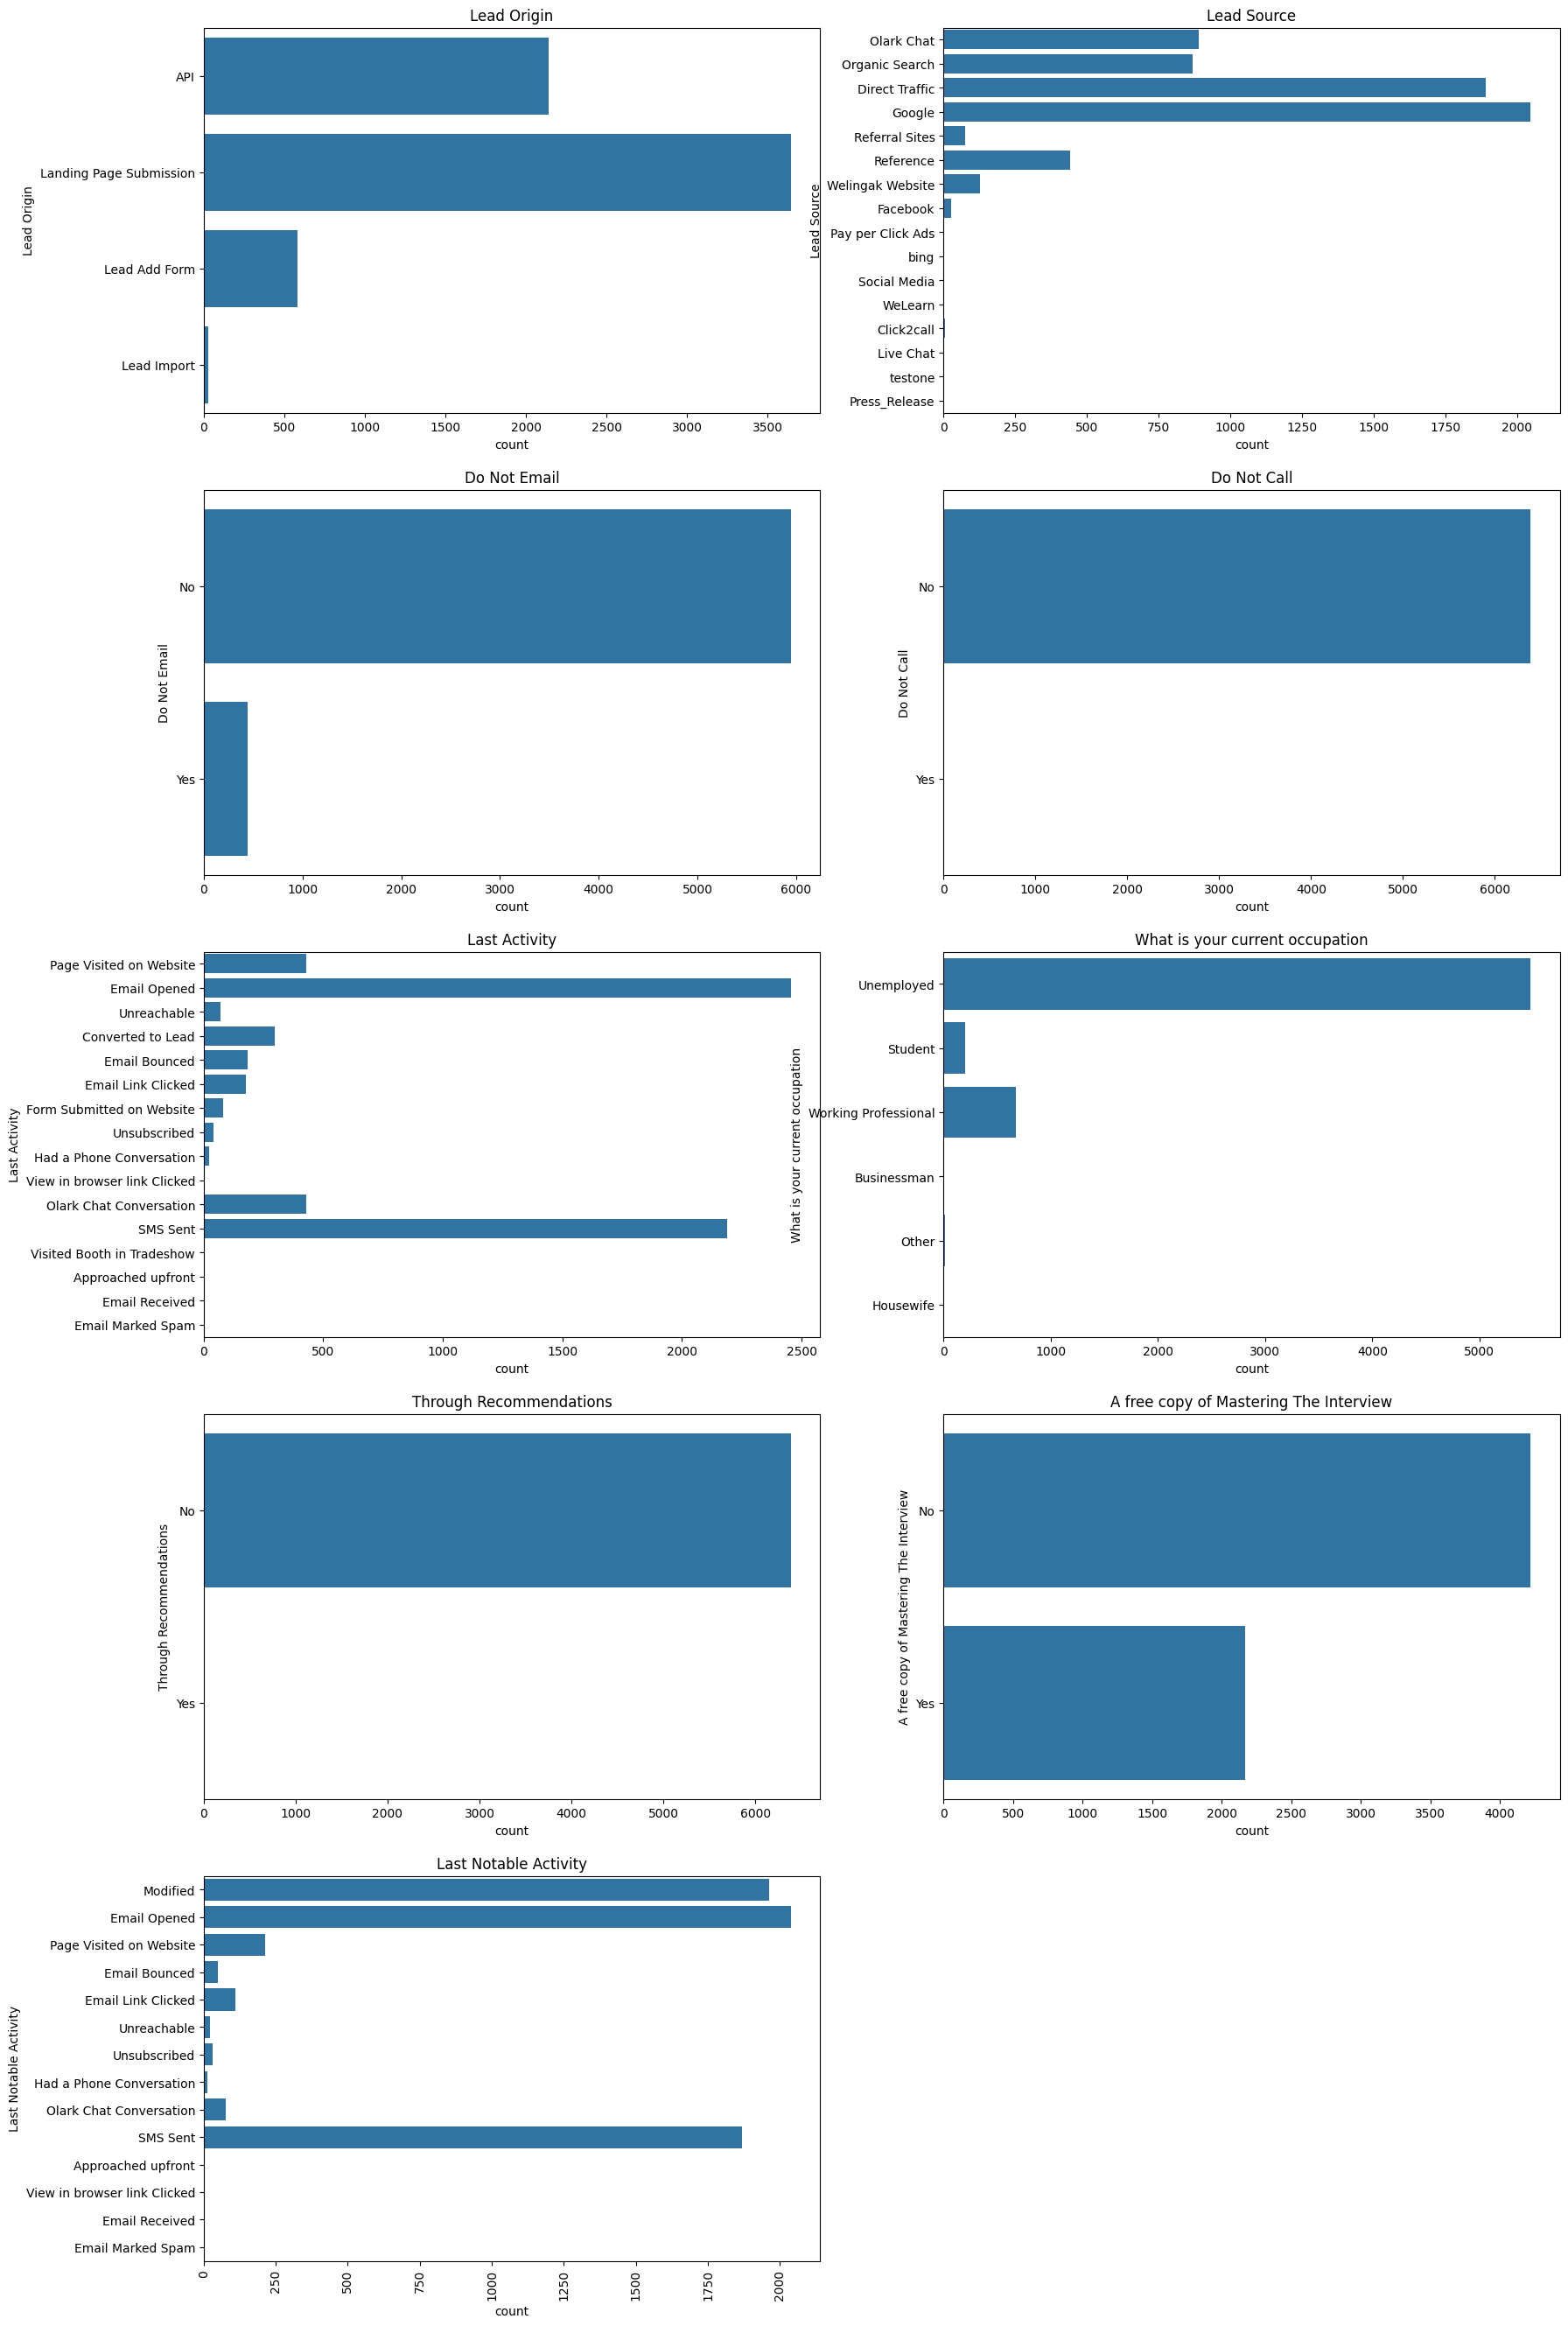

In [45]:
# Let us analyze the count plot for few columns

plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(lead_df['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(lead_df['Lead Source'])
plt.title('Lead Source')

plt.subplot(6,2,3)
sns.countplot(lead_df['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,4)
sns.countplot(lead_df['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,5)
sns.countplot(lead_df['Last Activity'])
plt.title('Last Activity')

plt.subplot(6,2,6)
sns.countplot(lead_df['What is your current occupation'])
plt.title('What is your current occupation')

plt.subplot(6,2,7)
sns.countplot(lead_df['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,8)
sns.countplot(lead_df['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,9)
sns.countplot(lead_df['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.show()

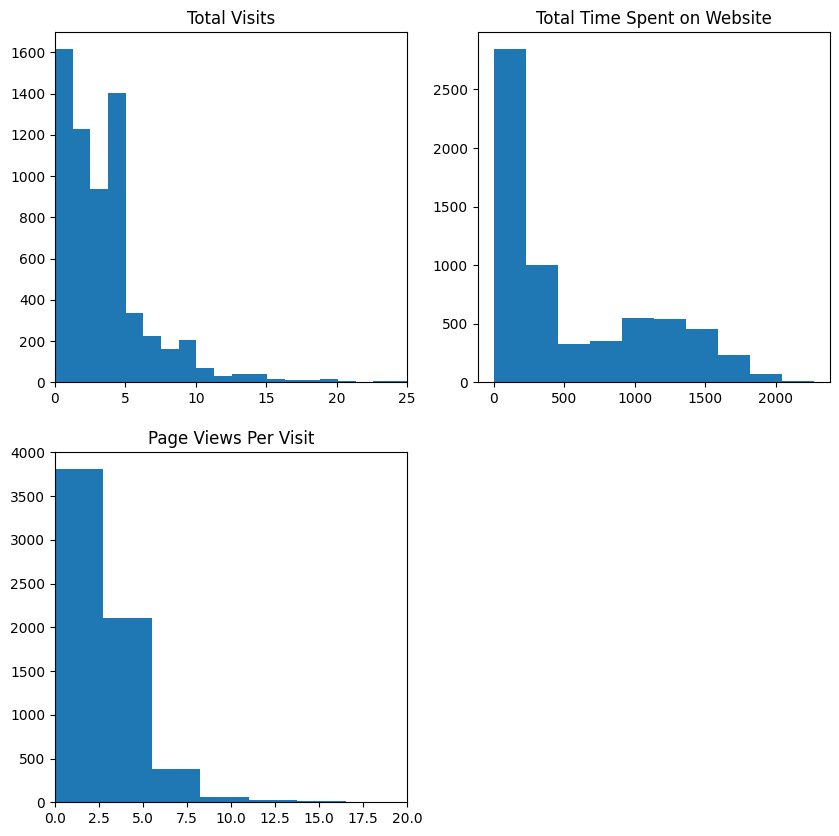

In [46]:
# Let us analyze the numerical values
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(lead_df['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(lead_df['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(lead_df['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

### Bivariate Analysis

#### Since, Converted is our target variable, comparing all categorical variable to Convereted

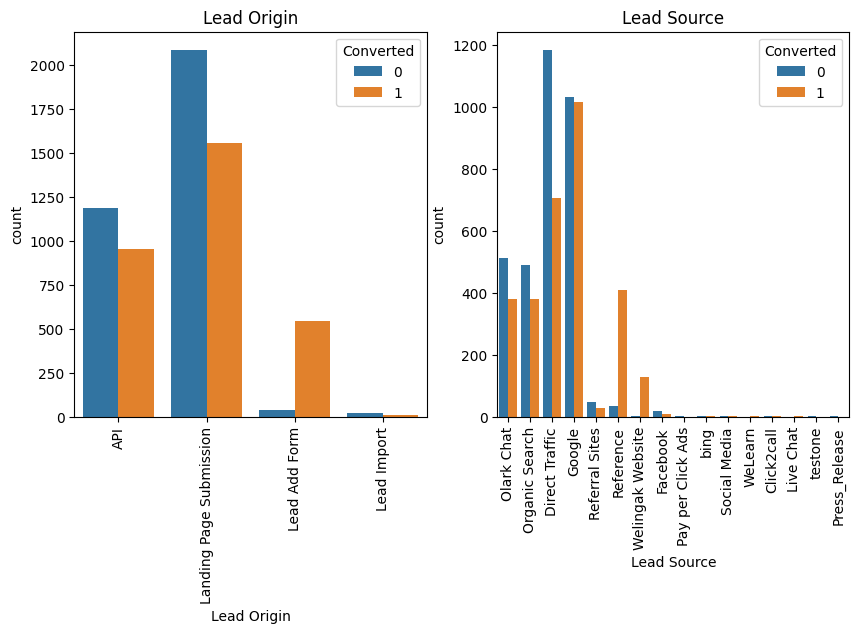

In [47]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

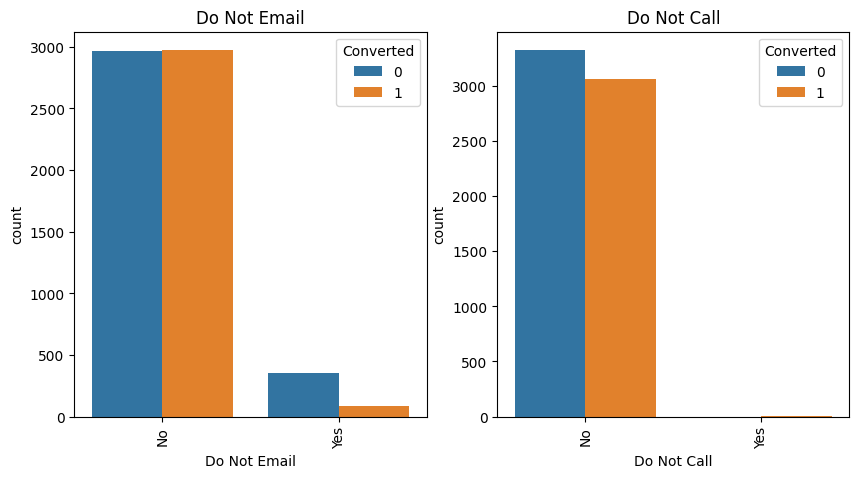

In [48]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

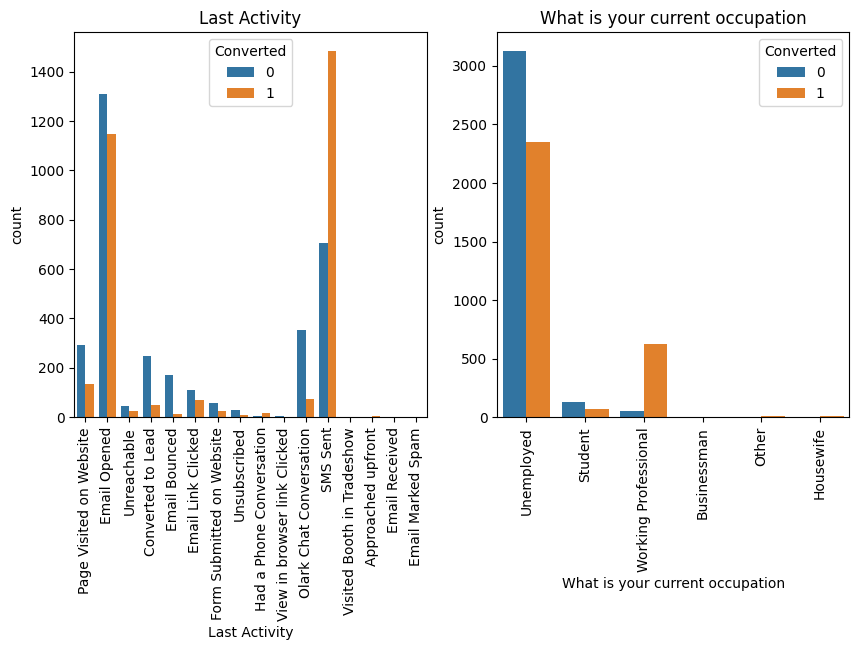

In [49]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

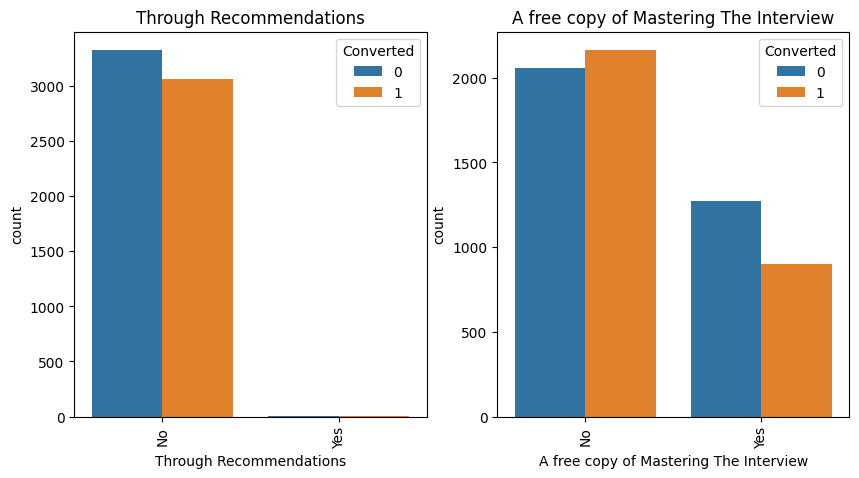

In [50]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

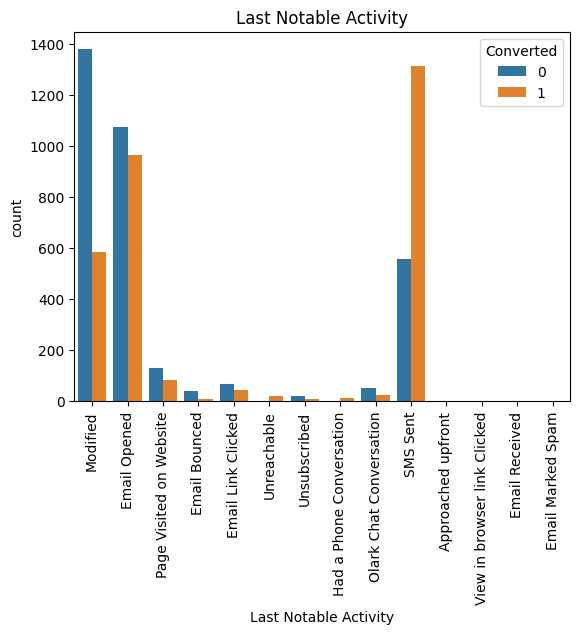

In [51]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

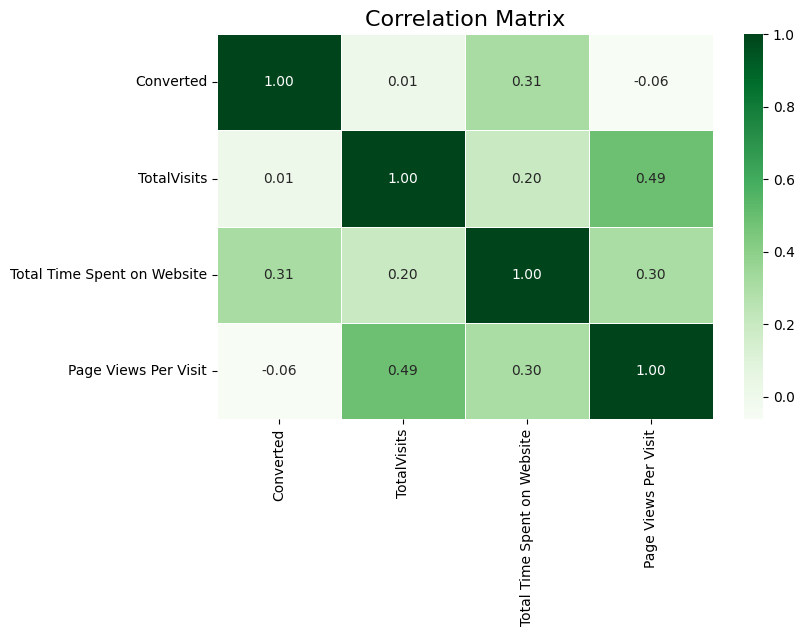

In [52]:
# Select numerical columns for the correlation matrix
numerical_columns = ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
correlation_matrix = lead_df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(
    correlation_matrix,
    annot=True,          # Display correlation coefficients
    cmap="Greens",       # Use the green color palette
    fmt=".2f",           # Format the numbers to 2 decimal places
    linewidths=0.5       # Add space between cells
)
plt.title("Correlation Matrix", fontsize=16)  # Add a title
plt.show()

So we can see that Total Time Spent on Website has moderate co-relation with the target variable Converted

### Data Preparation 

Dummy Variable Creation

In [53]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6391 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6391 non-null   object 
 1   Lead Source                             6391 non-null   object 
 2   Do Not Email                            6391 non-null   object 
 3   Do Not Call                             6391 non-null   object 
 4   Converted                               6391 non-null   int64  
 5   TotalVisits                             6391 non-null   float64
 6   Total Time Spent on Website             6391 non-null   int64  
 7   Page Views Per Visit                    6391 non-null   float64
 8   Last Activity                           6391 non-null   object 
 9   What is your current occupation         6391 non-null   object 
 10  Through Recommendations                 6391 non-null   object 
 

In [54]:
# Check the columns in the dataframe that are of object type
object_columns = lead_df.loc[:, lead_df.dtypes == 'object']
object_columns.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'What is your current occupation',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [55]:
# Create dummy variables for the above columns
dummy = pd.get_dummies(lead_df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'What is your current occupation',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity']], drop_first=True).astype(int)

# Add the results to the master dataframe
lead_df = pd.concat([lead_df, dummy], axis=1)

In [56]:
# Drop the variables for which the dummy variables have been created

lead_df = lead_df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'What is your current occupation',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity'], axis=1)

In [57]:
# Check the dataset post dummy variable creation

lead_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [58]:
# check the datatypes and other details again
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6391 entries, 0 to 9239
Data columns (total 59 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             6391 non-null   int64  
 1   TotalVisits                                           6391 non-null   float64
 2   Total Time Spent on Website                           6391 non-null   int64  
 3   Page Views Per Visit                                  6391 non-null   float64
 4   Lead Origin_Landing Page Submission                   6391 non-null   int64  
 5   Lead Origin_Lead Add Form                             6391 non-null   int64  
 6   Lead Origin_Lead Import                               6391 non-null   int64  
 7   Lead Source_Direct Traffic                            6391 non-null   int64  
 8   Lead Source_Facebook                                  6391 non-

### Test-Train Data Split

In [59]:
# import required library
from sklearn.model_selection import train_test_split

In [60]:
# Put all the feature variables in X

X = lead_df.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [61]:
# Put the target variable in y

y = lead_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [62]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

### Scaling

In [63]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
270,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6872,0.007968,0.183979,0.036364,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6682,0.007968,0.027289,0.018182,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2029,0.039841,0.064701,0.045455,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
6765,0.007968,0.062500,0.036364,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


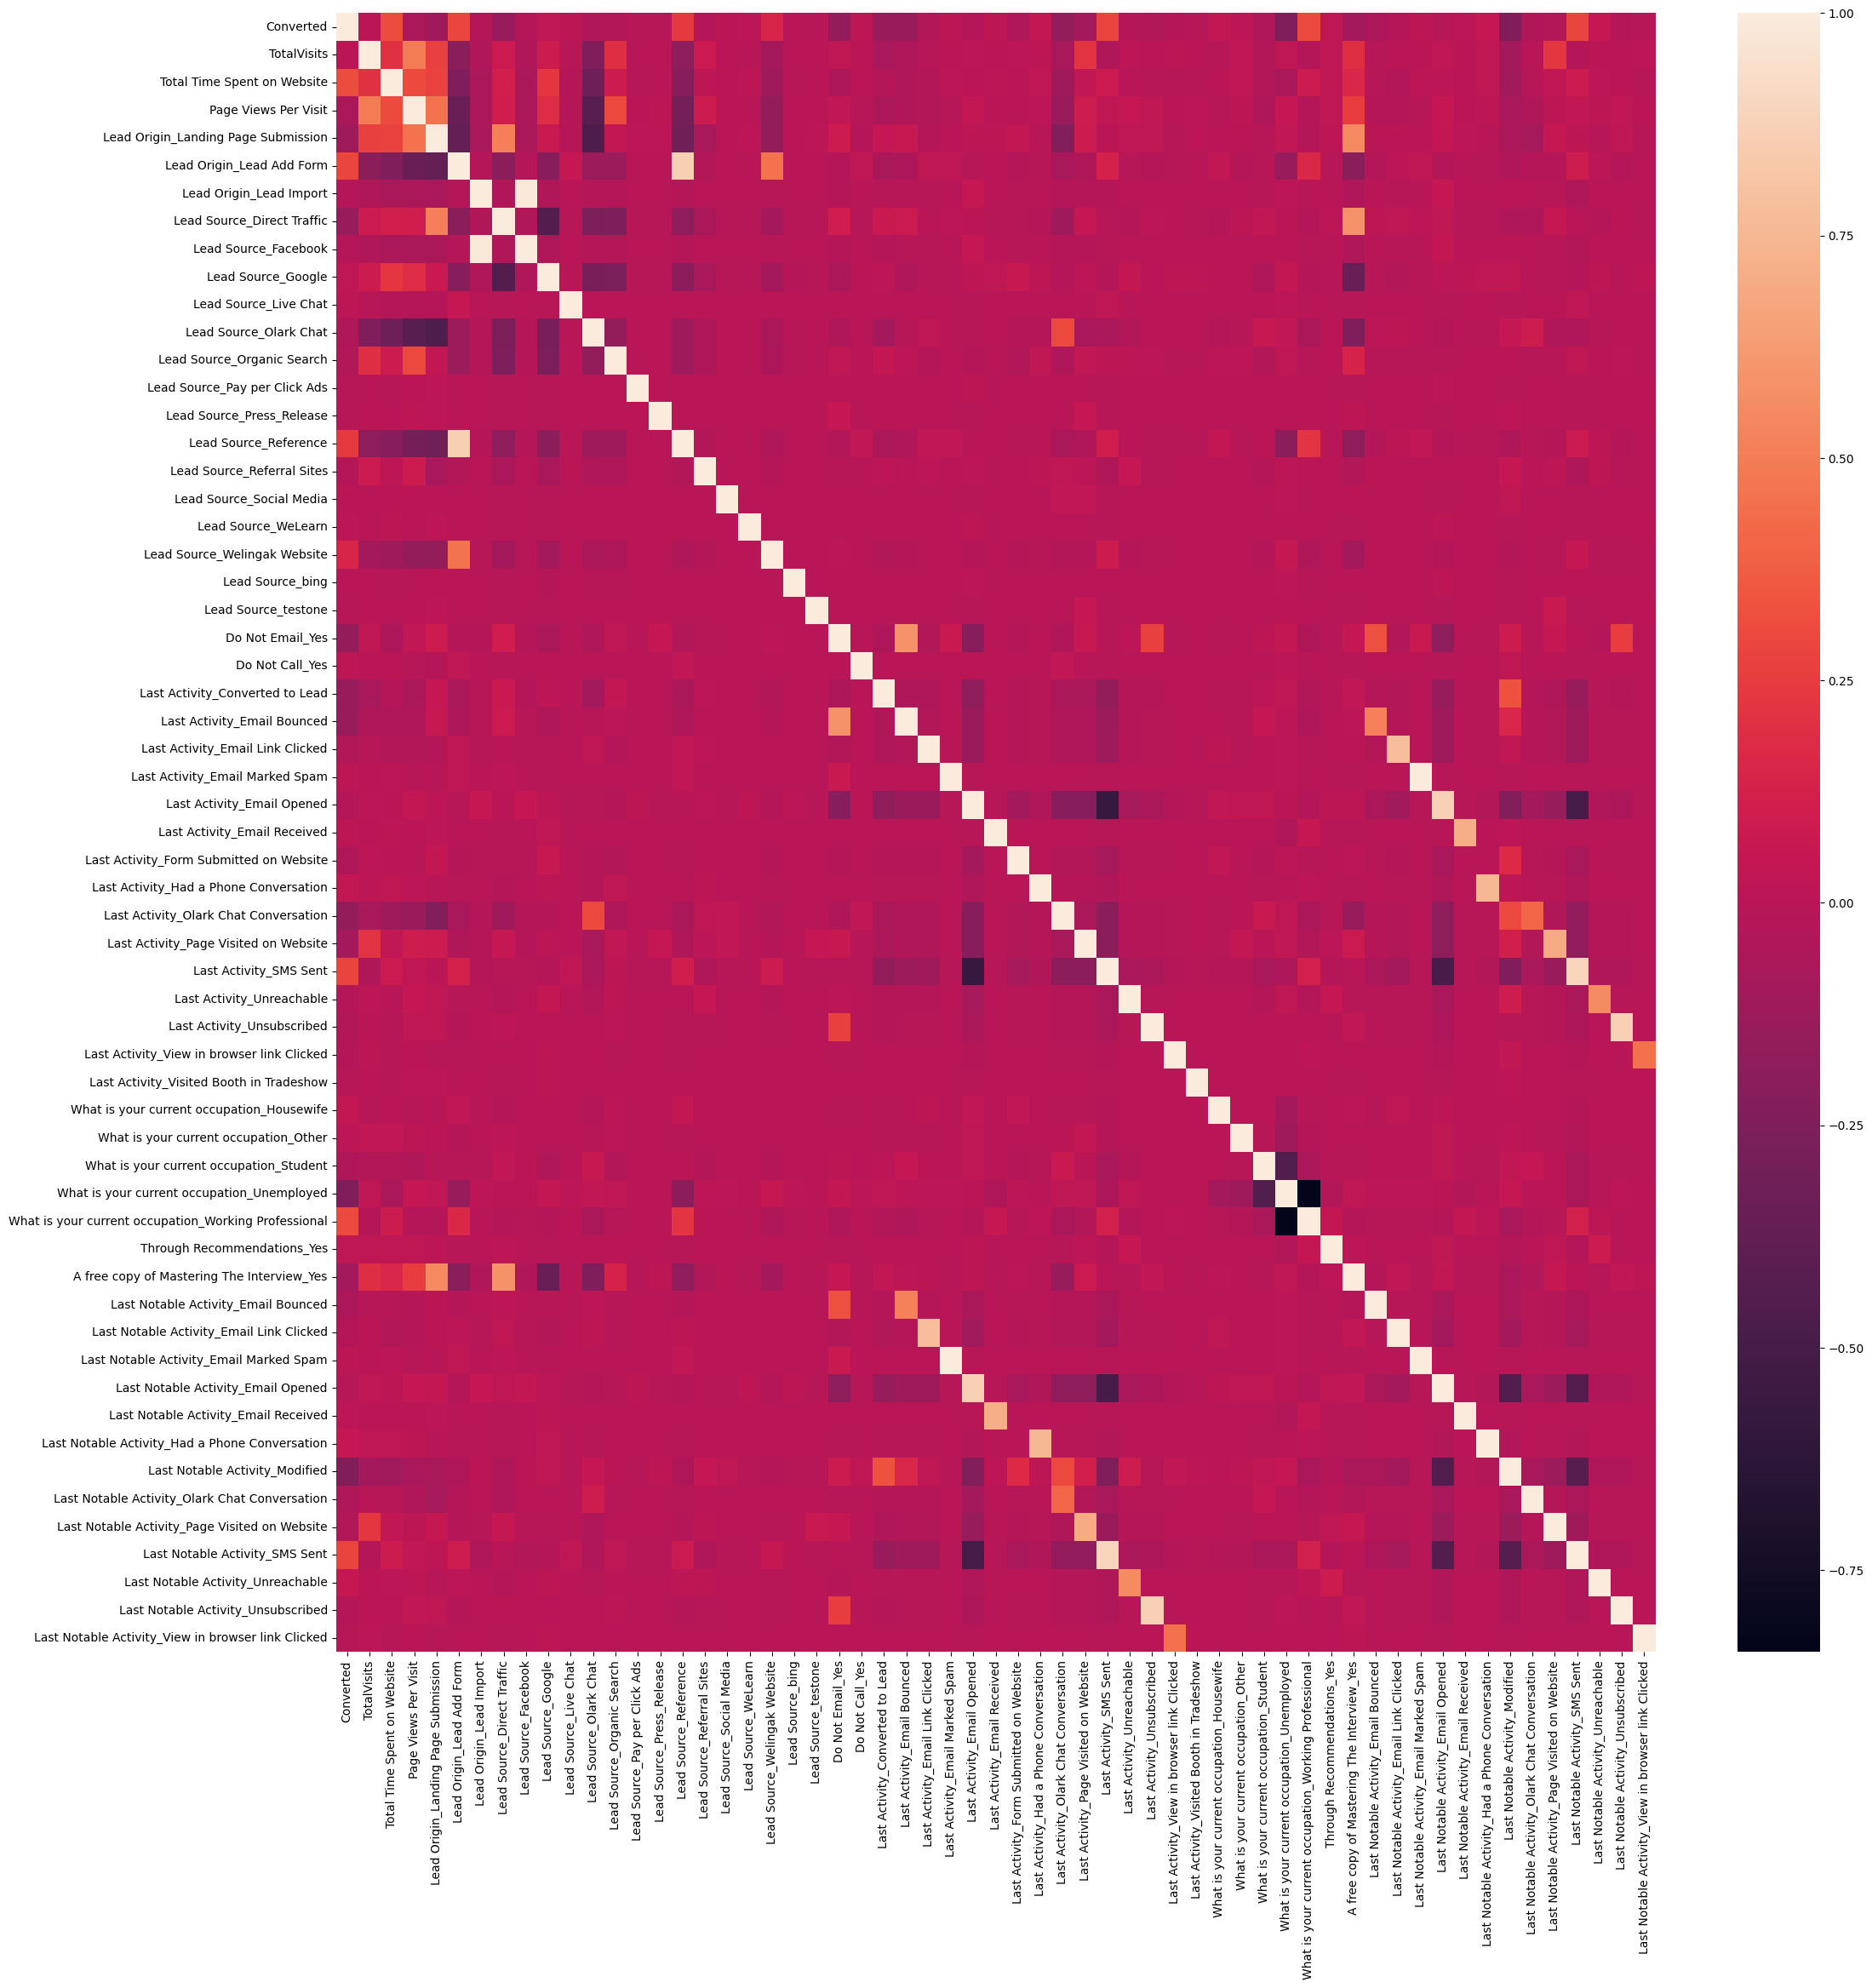

In [64]:
# Looking at the correlation table
plt.figure(figsize = (25,25))
sns.heatmap(lead_df.corr())
plt.show()

### 3. Model Building

In [65]:
# Import necessary libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


In [66]:

# Define the logistic regression model
logreg = LogisticRegression()

# Run RFE with 15 variables as output
rfe = RFE(logreg, n_features_to_select=20)         
rfe = rfe.fit(X_train, y_train)

In [67]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', np.True_, np.int64(1)),
 ('Total Time Spent on Website', np.True_, np.int64(1)),
 ('Page Views Per Visit', np.True_, np.int64(1)),
 ('Lead Origin_Landing Page Submission', np.False_, np.int64(18)),
 ('Lead Origin_Lead Add Form', np.True_, np.int64(1)),
 ('Lead Origin_Lead Import', np.False_, np.int64(28)),
 ('Lead Source_Direct Traffic', np.False_, np.int64(6)),
 ('Lead Source_Facebook', np.False_, np.int64(19)),
 ('Lead Source_Google', np.False_, np.int64(9)),
 ('Lead Source_Live Chat', np.False_, np.int64(33)),
 ('Lead Source_Olark Chat', np.True_, np.int64(1)),
 ('Lead Source_Organic Search', np.False_, np.int64(8)),
 ('Lead Source_Pay per Click Ads', np.False_, np.int64(23)),
 ('Lead Source_Press_Release', np.False_, np.int64(35)),
 ('Lead Source_Reference', np.True_, np.int64(1)),
 ('Lead Source_Referral Sites', np.False_, np.int64(7)),
 ('Lead Source_Social Media', np.False_, np.int64(12)),
 ('Lead Source_WeLearn', np.False_, np.int64(22)),
 ('Lead Source_Welinga

In [68]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]

In [69]:
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [70]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_testone', 'Do Not Call_Yes', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'What is your current occupation_Other', 'Through Recommendations_Yes',
       'A free copy of M

In [71]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [72]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [73]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    # Ensure only numeric columns are included
    df_numeric = df.select_dtypes(include=[float, int])
    
    # Handle missing values by dropping rows with NaNs (or you could impute them)
    df_numeric = df_numeric.dropna()
    
    vif = pd.DataFrame()
    vif['Features'] = df_numeric.columns
    vif['VIF'] = [variance_inflation_factor(df_numeric.values, i) for i in range(df_numeric.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif 

In [74]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [75]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
3,Lead Origin_Lead Add Form,57.89
5,Lead Source_Reference,45.09
6,Lead Source_Welingak Website,13.76
14,What is your current occupation_Unemployed,6.73
2,Page Views Per Visit,3.93
1,Total Time Spent on Website,2.42
17,Last Notable Activity_Had a Phone Conversation,2.16
9,Last Activity_Had a Phone Conversation,2.16
18,Last Notable Activity_Modified,1.93
0,TotalVisits,1.90


Lead Origin_Lead Add Form and Lead Source_Reference have very high VIF

In [76]:
# Import statsmodels

import statsmodels.api as sm

In [77]:
# Building 1st logistic regression model

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4452
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2041.8
Date:                Mon, 16 Dec 2024   Deviance:                       4083.5
Time:                        22:28:20   Pearson chi2:                 4.68e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3759
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1636      0.601     -1.936      0.053      -2.342       0.014
TotalVisits                                             16.5080      3.504      4.711      0.000       9.640      23.376
Total Time Spent on Website                              4.3978      0.187     23.468      0.000       4.030       4.765
Page Views Per Visit                                    -5.3957      1.524     -3.540      0.000      -8.383      -2.408
Lead Origin_Lead Add Form                                2.0525      0.921      2.228      0.026       0.247       3.858
Lead Source_Olark Chat                                   1.3909      0.140      9.948      0.000       1.117       1.665
Lead Source_Reference                                    1.7391      0.946      1.838      0.066      -0.116       3.594
Lead Source_Welingak Website                             3.3090      1.167      2.836      0.005       1.023       5.595
Do Not Email_Yes                                        -1.5071      0.193     -7.802      0.000      -1.886      -1.129
Last Activity_Converted to Lead                         -0.6651      0.247     -2.696      0.007      -1.149      -0.182
Last Activity_Had a Phone Conversation                   1.3995      0.956      1.465      0.143      -0.473       3.272
Last Activity_Olark Chat Conversation                   -0.9356      0.192     -4.863      0.000      -1.313      -0.558
Last Activity_SMS Sent                                   0.9358      0.086     10.885      0.000       0.767       1.104
What is your current occupation_Housewife               22.9168   2.82e+04      0.001      0.999   -5.53e+04    5.54e+04
What is your current occupation_Student                 -0.7138      0.627     -1.139      0.255      -1.942       0.514
What is your current occupation_Unemployed              -0.6156      0.590     -1.044      0.296      -1.771       0.540
What is your current occupation_Working Professional     2.0098      0.619      3.247      0.001       0.797       3.223
Last Notable Activity_Email Link Clicked                -0.7191      0.301     -2.388      0.017      -1.309      -0.129
Last Notable Activity_Had a Phone Conversation          22.3156   2.29e+04      0.001      0.999   -4.49e+04    4.49e+04
Last Notable Activity_Modified                          -0.6183      0.098     -6.318      0.000      -0.810      -0.427
Last Notable Activity_Unreachable                        3.0838      1.079      2.858      0.004       0.969       5.199
========================================================================================================================
"""

In [78]:
# As Lead Origin_Lead Add Form and Lead Source_Reference have very high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['Lead Origin_Lead Add Form','Lead Source_Reference'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
12,What is your current occupation_Unemployed,5.47
2,Page Views Per Visit,3.52
1,Total Time Spent on Website,2.26
7,Last Activity_Had a Phone Conversation,2.16
15,Last Notable Activity_Had a Phone Conversation,2.16
16,Last Notable Activity_Modified,1.93
0,TotalVisits,1.90
9,Last Activity_SMS Sent,1.75
3,Lead Source_Olark Chat,1.66
13,What is your current occupation_Working Profes...,1.53


In [79]:
# Building 2nd logistic regression model

X_train_sm = sm.add_constant(X_train_new)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4454
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2219.8
Date:                Mon, 16 Dec 2024   Deviance:                       4439.5
Time:                        22:28:21   Pearson chi2:                 4.60e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3242
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0291      0.585      0.050      0.960      -1.117       1.175
TotalVisits                                             10.2975      3.202      3.216      0.001       4.023      16.572
Total Time Spent on Website                              3.6109      0.174     20.769      0.000       3.270       3.952
Page Views Per Visit                                   -14.1976      1.466     -9.687      0.000     -17.070     -11.325
Lead Source_Olark Chat                                   0.4028      0.122      3.305      0.001       0.164       0.642
Lead Source_Welingak Website                             4.3276      0.724      5.974      0.000       2.908       5.747
Do Not Email_Yes                                        -1.4973      0.179     -8.361      0.000      -1.848      -1.146
Last Activity_Converted to Lead                         -1.1910      0.238     -5.004      0.000      -1.657      -0.724
Last Activity_Had a Phone Conversation                   1.4050      0.863      1.627      0.104      -0.287       3.097
Last Activity_Olark Chat Conversation                   -1.0301      0.185     -5.579      0.000      -1.392      -0.668
Last Activity_SMS Sent                                   0.9712      0.082     11.895      0.000       0.811       1.131
What is your current occupation_Housewife               23.1338   2.92e+04      0.001      0.999   -5.72e+04    5.72e+04
What is your current occupation_Student                 -0.7877      0.610     -1.292      0.196      -1.982       0.407
What is your current occupation_Unemployed              -0.7795      0.577     -1.352      0.176      -1.910       0.351
What is your current occupation_Working Professional     2.0109      0.605      3.324      0.001       0.825       3.197
Last Notable Activity_Email Link Clicked                -0.5365      0.281     -1.908      0.056      -1.088       0.015
Last Notable Activity_Had a Phone Conversation          22.1352   2.28e+04      0.001      0.999   -4.46e+04    4.47e+04
Last Notable Activity_Modified                          -0.5736      0.092     -6.258      0.000      -0.753      -0.394
Last Notable Activity_Unreachable                        3.0645      1.059      2.894      0.004       0.989       5.140
========================================================================================================================
"""

In [80]:
# As What is your current occupation_Unemployed have high VIF >5 hence we can drop it
X_train_new = X_train_new.drop(['What is your current occupation_Unemployed'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,Page Views Per Visit,2.77
7,Last Activity_Had a Phone Conversation,2.16
14,Last Notable Activity_Had a Phone Conversation,2.16
1,Total Time Spent on Website,1.97
0,TotalVisits,1.87
15,Last Notable Activity_Modified,1.73
9,Last Activity_SMS Sent,1.50
8,Last Activity_Olark Chat Conversation,1.35
3,Lead Source_Olark Chat,1.26
6,Last Activity_Converted to Lead,1.23


In [81]:
# Building 3rd logistic regression model

X_train_sm = sm.add_constant(X_train_new)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4455
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2220.7
Date:                Mon, 16 Dec 2024   Deviance:                       4441.4
Time:                        22:28:22   Pearson chi2:                 4.60e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3239
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7510      0.094     -8.010      0.000      -0.935      -0.567
TotalVisits                                             10.5722      3.193      3.311      0.001       4.314      16.831
Total Time Spent on Website                              3.6138      0.174     20.791      0.000       3.273       3.954
Page Views Per Visit                                   -14.1778      1.465     -9.676      0.000     -17.050     -11.306
Lead Source_Olark Chat                                   0.4061      0.122      3.333      0.001       0.167       0.645
Lead Source_Welingak Website                             4.3302      0.724      5.977      0.000       2.910       5.750
Do Not Email_Yes                                        -1.5003      0.179     -8.378      0.000      -1.851      -1.149
Last Activity_Converted to Lead                         -1.1936      0.238     -5.016      0.000      -1.660      -0.727
Last Activity_Had a Phone Conversation                   1.4016      0.864      1.623      0.105      -0.291       3.094
Last Activity_Olark Chat Conversation                   -1.0296      0.185     -5.579      0.000      -1.391      -0.668
Last Activity_SMS Sent                                   0.9665      0.082     11.849      0.000       0.807       1.126
What is your current occupation_Housewife               23.9104   2.92e+04      0.001      0.999   -5.72e+04    5.72e+04
What is your current occupation_Student                 -0.0122      0.206     -0.059      0.953      -0.415       0.391
What is your current occupation_Working Professional     2.7878      0.189     14.753      0.000       2.417       3.158
Last Notable Activity_Email Link Clicked                -0.5422      0.281     -1.928      0.054      -1.093       0.009
Last Notable Activity_Had a Phone Conversation          22.1284   2.28e+04      0.001      0.999   -4.46e+04    4.47e+04
Last Notable Activity_Modified                          -0.5734      0.092     -6.259      0.000      -0.753      -0.394
Last Notable Activity_Unreachable                        3.0665      1.058      2.897      0.004       0.992       5.141
========================================================================================================================
"""

In [82]:
# We can drop Last Activity_Had a Phone Conversation, What is your current occupation_Housewife, What is your current occupation_Student and Last Notable Activity_Had a Phone Conversation variables as it has high p-value
X_train_new = X_train_new.drop(['Last Activity_Had a Phone Conversation','What is your current occupation_Housewife','What is your current occupation_Student','Last Notable Activity_Had a Phone Conversation'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,Page Views Per Visit,2.77
1,Total Time Spent on Website,1.96
0,TotalVisits,1.87
11,Last Notable Activity_Modified,1.72
8,Last Activity_SMS Sent,1.49
7,Last Activity_Olark Chat Conversation,1.34
3,Lead Source_Olark Chat,1.25
6,Last Activity_Converted to Lead,1.23
9,What is your current occupation_Working Profes...,1.13
5,Do Not Email_Yes,1.08


In [83]:
# Building 4th logistic regression model

X_train_sm = sm.add_constant(X_train_new)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4459
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2233.3
Date:                Mon, 16 Dec 2024   Deviance:                       4466.6
Time:                        22:28:22   Pearson chi2:                 4.61e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3201
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7225      0.093     -7.786      0.000      -0.904      -0.541
TotalVisits                                             10.9477      3.170      3.453      0.001       4.734      17.162
Total Time Spent on Website                              3.5941      0.173     20.755      0.000       3.255       3.934
Page Views Per Visit                                   -14.3159      1.461     -9.797      0.000     -17.180     -11.452
Lead Source_Olark Chat                                   0.3862      0.122      3.178      0.001       0.148       0.624
Lead Source_Welingak Website                             4.3107      0.724      5.951      0.000       2.891       5.730
Do Not Email_Yes                                        -1.5088      0.179     -8.435      0.000      -1.859      -1.158
Last Activity_Converted to Lead                         -1.2177      0.237     -5.128      0.000      -1.683      -0.752
Last Activity_Olark Chat Conversation                   -1.0476      0.184     -5.689      0.000      -1.408      -0.687
Last Activity_SMS Sent                                   0.9468      0.081     11.675      0.000       0.788       1.106
What is your current occupation_Working Professional     2.7770      0.189     14.717      0.000       2.407       3.147
Last Notable Activity_Email Link Clicked                -0.5630      0.281     -2.004      0.045      -1.114      -0.012
Last Notable Activity_Modified                          -0.5698      0.091     -6.257      0.000      -0.748      -0.391
Last Notable Activity_Unreachable                        3.0423      1.058      2.875      0.004       0.968       5.116
========================================================================================================================
"""

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

### 4. Model Evaluation

In [85]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train_new))
y_train_pred[:10]

270     0.886404
6872    0.611148
6682    0.070112
2029    0.330804
6765    0.282672
2185    0.277895
6895    0.414573
6477    0.759196
154     0.643619
8535    0.207360
dtype: float64

In [86]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.8864036 , 0.61114813, 0.07011225, 0.33080442, 0.28267226,
       0.27789543, 0.41457258, 0.75919634, 0.64361886, 0.20736021])

In [87]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.886404
1,1,0.611148
2,0,0.070112
3,1,0.330804
4,0,0.282672


#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [96]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.886404,1
1,1,0.611148,1
2,0,0.070112,0
3,1,0.330804,0
4,0,0.282672,0


In [97]:
from sklearn import metrics

# Confusion matrix (already computed)
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print("Confusion Matrix:")
print(confusion)

# Extracting TP, TN, FP, FN
TP = confusion[1,1]  # True positives
TN = confusion[0,0]  # True negatives
FP = confusion[0,1]  # False positives
FN = confusion[1,0]  # False negatives

# Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Accuracy:", accuracy)

# Sensitivity (Recall or True Positive Rate)
sensitivity = TP / (TP + FN)
print("Sensitivity (Recall):", sensitivity)

# Specificity (True Negative Rate)
specificity = TN / (TN + FP)
print("Specificity (True Negative Rate):", specificity)

Confusion Matrix:
[[1893  442]
 [ 627 1511]]
Accuracy: 0.7610105074893807
Sensitivity (Recall): 0.7067352666043031
Specificity (True Negative Rate): 0.8107066381156317
